In [1]:
import findspark

In [2]:
findspark.init('C:\spark')

In [3]:
import pyspark

In [4]:
from pyspark import SparkContext
from pyspark.streaming import StreamingContext
from pyspark.sql import SQLContext
from pyspark.sql.functions import desc

In [5]:
# Sadece bir kez çalıştırılır. Hata olursa çekirdeği(kernel) tekrar başlatın.
sc = SparkContext() # Spark işlevselliği için ana giriş noktası.

In [6]:
ssc = StreamingContext(sc, 2 )  # 2 yürütme iş parçacığı ve 2 saniyelik parti aralığı ile yerel bir StreamingContext öğesi oluşturuyoruz.
sqlContext = SQLContext(sc) # Sorgulamak için SQL kullanmamıza izin verir

In [7]:
socket_stream = ssc.socketTextStream("localhost", 9995)

In [8]:
lines = socket_stream.window( 20 )

In [9]:
from collections import namedtuple # Her elemana bir alan
fields = ("tag", "count" )
Tweet = namedtuple( 'Tweet', fields )

In [10]:
( lines.flatMap( lambda text: text.split( " " ) ) #lines split
  .filter( lambda word: word.lower().startswith("#") ) # hashtag ile başlayanlar
  .map( lambda word: ( word.lower(), 1 ) ) # küçük harf, tuple ayarla
  .reduceByKey( lambda a, b: a + b )
  .map( lambda rec: Tweet( rec[0], rec[1] ) ) # Tweet objesindekiler
  .foreachRDD( lambda rdd: rdd.toDF().sort( desc("count") ) # çoktan aza sıralama
  .limit(10).registerTempTable("tweets") ) ) # her 10 tweet için tablo 1 tablo

In [11]:
sqlContext

In [12]:
ssc.start()

In [13]:
import time
from IPython import display # Enables us to show stuff in the notebook
import matplotlib.pyplot as plt #Visualization library
import seaborn as sns # Visualization library
# Only works for Jupyter Notebooks!
# The following code enables us to view the bar plot within a cell in the jupyter notebook
%matplotlib inline

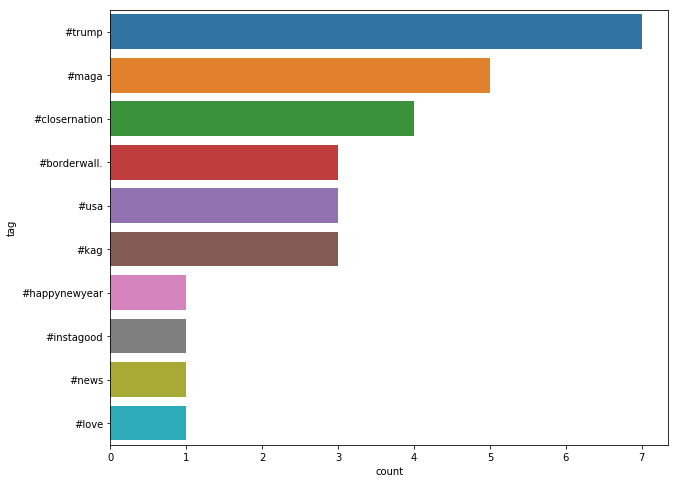

In [ ]:
count = 0
while count < 10:
    
    time.sleep( 10 )
    top_10_tweets = sqlContext.sql( 'Select tag, count from tweets' )
    top_10_df = top_10_tweets.toPandas() # Dataframe library
    display.clear_output(wait=True) #Clears the output, if a plot exists.
    fig = plt.figure( figsize = ( 10, 8 ) )
    sns.barplot( x="count", y="tag", data=top_10_df)
    plt.savefig(f"Tag{count}.png")
    plt.show()
    count = count + 1

'5'

In [ ]:
ssc.stop()

In [ ]:
plt.savefig()